# Image classification

https://www.tensorflow.org/tutorials/images/classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This tutorial uses a dataset of about 3,700 photos of flowers. The dataset contains 5 sub-directories, one per class:

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 49s 0us/step


In [10]:
data_dir

PosixPath('/home/szzz/.keras/datasets/flower_photos')

In [3]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


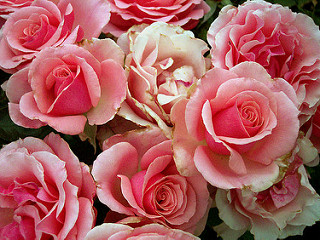

In [4]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

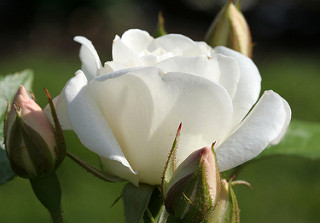

In [5]:
PIL.Image.open(str(roses[1]))

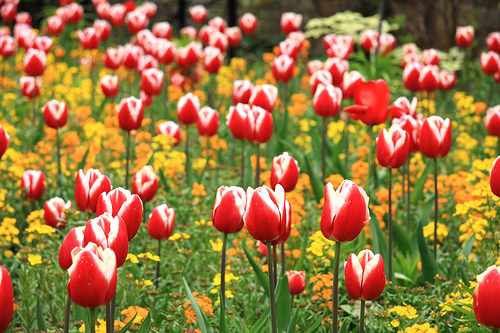

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

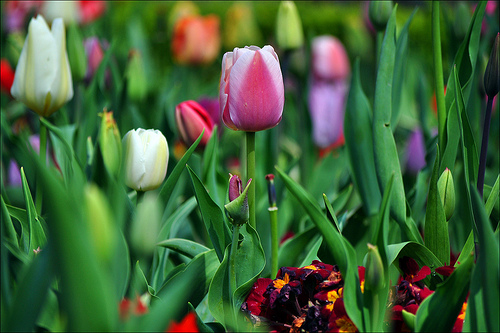

In [7]:
PIL.Image.open(str(tulips[1]))

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [15]:
dir(train_ds)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_de

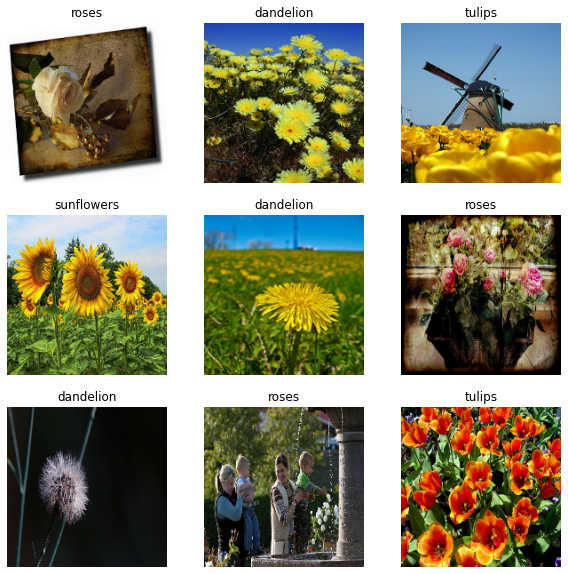

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [17]:
image_batch

<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
array([[[[8.83888855e+01, 1.24388885e+02, 2.00388885e+02],
         [8.89277802e+01, 1.24927780e+02, 2.00927780e+02],
         [8.88342590e+01, 1.25369446e+02, 1.99212967e+02],
         ...,
         [2.14580017e+02, 8.65392227e+01, 2.93608099e-01],
         [2.33405533e+02, 1.02674973e+02, 5.17222071e+00],
         [2.28703690e+02, 9.76851730e+01, 2.50831127e+00]],

        [[9.02777786e+01, 1.26277779e+02, 2.02277786e+02],
         [9.08666611e+01, 1.27150002e+02, 2.03008331e+02],
         [9.50527802e+01, 1.33036102e+02, 2.06155548e+02],
         ...,
         [1.61444641e+02, 6.94110336e+01, 9.16383362e+00],
         [1.72708313e+02, 6.47249908e+01, 1.37494326e+00],
         [1.53869415e+02, 6.37055588e+01, 4.15557909e+00]],

        [[9.30277786e+01, 1.31027786e+02, 2.06027786e+02],
         [9.27500000e+01, 1.30819443e+02, 2.05819443e+02],
         [9.83518524e+01, 1.37162033e+02, 2.09879623e+02],
         ...,
         [

In [18]:
image_batch.numpy()

array([[[[8.83888855e+01, 1.24388885e+02, 2.00388885e+02],
         [8.89277802e+01, 1.24927780e+02, 2.00927780e+02],
         [8.88342590e+01, 1.25369446e+02, 1.99212967e+02],
         ...,
         [2.14580017e+02, 8.65392227e+01, 2.93608099e-01],
         [2.33405533e+02, 1.02674973e+02, 5.17222071e+00],
         [2.28703690e+02, 9.76851730e+01, 2.50831127e+00]],

        [[9.02777786e+01, 1.26277779e+02, 2.02277786e+02],
         [9.08666611e+01, 1.27150002e+02, 2.03008331e+02],
         [9.50527802e+01, 1.33036102e+02, 2.06155548e+02],
         ...,
         [1.61444641e+02, 6.94110336e+01, 9.16383362e+00],
         [1.72708313e+02, 6.47249908e+01, 1.37494326e+00],
         [1.53869415e+02, 6.37055588e+01, 4.15557909e+00]],

        [[9.30277786e+01, 1.31027786e+02, 2.06027786e+02],
         [9.27500000e+01, 1.30819443e+02, 2.05819443e+02],
         [9.83518524e+01, 1.37162033e+02, 2.09879623e+02],
         ...,
         [1.18514069e+02, 5.96759567e+01, 8.26373959e+00],
         [

In [19]:
labels_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([3, 3, 4, 4, 1, 3, 4, 3, 4, 4, 1, 3, 0, 0, 2, 4, 1, 3, 1, 1, 1, 3,
       1, 2, 1, 3, 4, 1, 4, 4, 4, 3], dtype=int32)>

In [20]:
labels_batch.numpy()

array([3, 3, 4, 4, 1, 3, 4, 3, 4, 4, 1, 3, 0, 0, 2, 4, 1, 3, 1, 1, 1, 3,
       1, 2, 1, 3, 4, 1, 4, 4, 4, 3], dtype=int32)

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [22]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [23]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [24]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [27]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 29s 319ms/step - loss: 1.3787 - accuracy: 0.4118 - val_loss: 1.0626 - val_accuracy: 0.5736
Epoch 2/5
92/92 [==============================] - 29s 316ms/step - loss: 0.9937 - accuracy: 0.6087 - val_loss: 0.9191 - val_accuracy: 0.6362
Epoch 3/5
92/92 [==============================] - 30s 324ms/step - loss: 0.7665 - accuracy: 0.7047 - val_loss: 0.8950 - val_accuracy: 0.6444
Epoch 4/5
92/92 [==============================] - 30s 324ms/step - loss: 0.5585 - accuracy: 0.8001 - val_loss: 0.9138 - val_accuracy: 0.6444
Epoch 5/5
92/92 [==============================] - 30s 323ms/step - loss: 0.3383 - accuracy: 0.8842 - val_loss: 1.0918 - val_accuracy: 0.6485


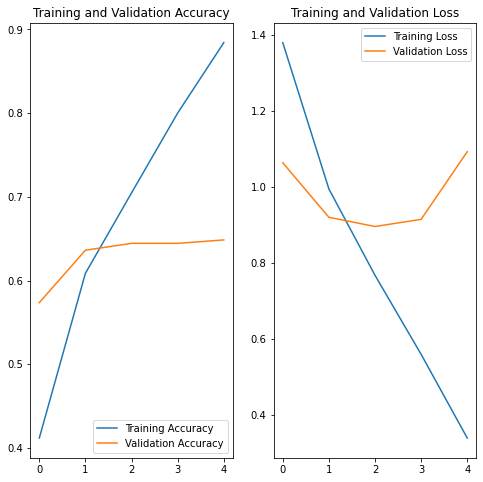

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

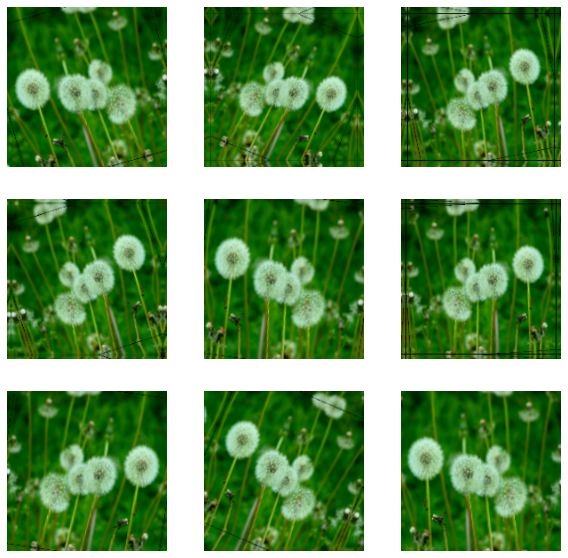

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [32]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)       

In [35]:
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
92/92 [==============================] - 32s 348ms/step - loss: 1.3582 - accuracy: 0.3999 - val_loss: 1.3334 - val_accuracy: 0.4387
Epoch 2/5
92/92 [==============================] - 33s 363ms/step - loss: 1.0917 - accuracy: 0.5504 - val_loss: 1.0504 - val_accuracy: 0.5749
Epoch 3/5
92/92 [==============================] - 33s 364ms/step - loss: 1.0071 - accuracy: 0.6001 - val_loss: 0.9125 - val_accuracy: 0.6526
Epoch 4/5
92/92 [==============================] - 33s 363ms/step - loss: 0.8945 - accuracy: 0.6574 - val_loss: 0.9310 - val_accuracy: 0.6322
Epoch 5/5
92/92 [==============================] - 34s 372ms/step - loss: 0.8319 - accuracy: 0.6757 - val_loss: 0.8285 - val_accuracy: 0.6757


In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)